In [90]:
from sklearn import datasets as ds
import pandas as pd
import plotly
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Iris dataset from the sklearn datasets library

iris=ds.load_iris()

In [3]:

type(iris)

sklearn.utils.Bunch

In [4]:
# Iris dataset is a type of Bunch which is like dictionary in python

# Getting all the keys available in iris dataset

print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


As we can see, There are 5 keys in iris dataset<br>

'data' contains the actual iris data<br>
'target' contains the target of the each entry<br>
'target_names" contains the names of the target<br>
'DESCR' contains the description of the dataset<br>
'feature_names' contains the names of the features<br>

In [5]:
# printing the target_names

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [43]:
# Verifying whether dataset is Balanced or Imbalanced
# printing how many samples of each class(Setosa, Versicolor and Virginica)

[len(iris_df[iris_df["target"]==x]) for x in range(len(iris.feature_names)-1)]

[50, 50, 50]

As we can see that, There are equal number of entries for each class. So dataset is balanced.

In [6]:
# We need data and target variables

x=iris.data
y=iris.target

# Creating dataframe 

iris_df=pd.DataFrame(x,columns=iris.feature_names)

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Adding target column to dataset to have better visualization

iris_df["target"]=iris.target

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


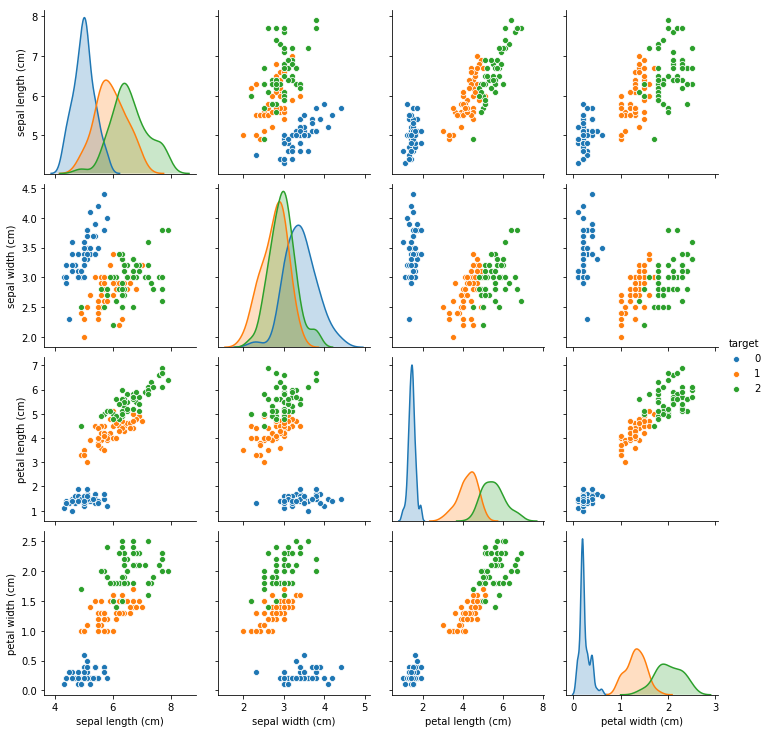

In [10]:
sns.pairplot(iris_df,hue="target")

Here target=0 means "Setosa"<br>
target=1 means "Versicolor",<br>
target=2 means Virginica<br>

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Initiation KNeighborsClassifier class
# Initially given K values as 6
knn=KNeighborsClassifier(n_neighbors=6)

In [13]:
# Now lets fit the model with Labelled data or know data. Fitting the Model is also know as Training the mode
knn.fit(iris.data,iris.target)
# fit method always takes numpy array as the input

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [14]:
# Now let's predict the output on some unknow data

X_new=np.array([[5.6,2.8,3.9,1.1],
                [5.7,2.6,3.8,1.3],
                [4.7,3.2,1.3,0.2]
               ])

knn.predict(X_new)

array([1, 1, 0])

Model predicted that first two entries are Versicolor and last entry as "Setosa"

In [15]:
# Now its time the measure the performance of the model.
# Accuracy is the common metric to evaluate classification model
# If we measure accuracy on the labelled data. We cannot make sure that accuracy is more generalized on the unseen data
# So it's always good idea to split the dataset into Training and Testing set.
# So that we will fit the model with training set,Make predictions on testing set and calculate accuracy on known testing labels

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)
# Here startify=y means, train_test_split will return training and test subsets with same proportion of target labels as main dataset

In [17]:
# Now lets fit the KNN model on training data

knn_train=KNeighborsClassifier(n_neighbors=8)
knn_train.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [18]:
# Make predictions on Testing data

y_pred=knn_train.predict(X_test)

In [19]:
print(y_pred)

[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [44]:
# Importing metrics for classification problem
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [46]:
print(accuracy_score(y_test,y_pred))

0.9555555555555556


# Interpretation from Confusion Matrix

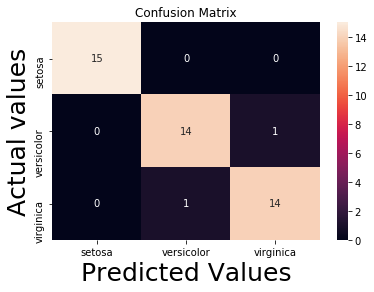

In [89]:
# Plotting confusion matrix using seaborn's heatmap

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,xticklabels=iris.target_names,yticklabels=iris.target_names);
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values",fontsize=25)
plt.ylabel("Actual values",fontsize=25);

There are total 45 data points in the test dataset after splitting, Each class contains 15 data points

<h4 style="color:#FF6767;"><b>Observations for Setosa flower</b></h4><br>
<ul>
    <li><b>True Positive</b>-->How many data points having setosa as target value are predicted as Setosa, In Our example, There are 15 data points which are predicted as Setosa and they are actually</li>
    <li><b>True Negative</b>-->How many data points have not Setosa as target value are not predicted as Setosa, In Our example there are 30 data points(Which are either Versicolor or Virginica) are not predicted as 'Setosa' and they are not actually</li>
    <li><b>False Positive</b>-->How many data points are predicted as "Setosa" but they are not actually Setosa", In our example there are no data points as such because all "Setosa" which are predicted are actually "Setosa"</li>
    <li><b>False Negative</b>-->How many data points are not predicted as "Setosa" but they are actually "Setosa:, In our example there no data points as such because No "Setosa" is misclassified</li>
</ul>

<h4 style="color:#FF6767;"><b>Observations for Versicolor Flower</b></h4><br>
<ul>
    <li><b>True Positive</b>-->How Many data points are predicted as versicolor and they are actually, In Our example, There 14 data points which are predicted as "Versicolor" and actually they are</li>
    <li><b>True Negative</b>How many data points are not predicted as "Versicolor" and actually they are not, In our example, There are 29 data points(Which are either setosa or virginica) are not predicted as "Versicolor" and they are not. Here 29 because one data point which is actually "Virginica" is predicted as "Versicolor"</li>
        <li><b>False positive</b>-->How many data points which are predicted as "Versicolor" but they are not. In Our example, There is only 1 data point which is predicted as Versicolor but actually it is not</li>
    <li><b>False Negative</b>How Many data points are not predicted as "Versicolor" but they are  actually. In our example, There is one data point which is predicted as "Virginica" but actually it is "Versicolor"</li>
</ul>
